# Iris Dataset

### Load Libraries

In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from IPython.display import Image, display
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
import time

### Load Dataset

In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
full_path = 'iris.csv'
dataframe = read_csv(full_path, names=names)

# rows/cols of data
print("rows and columns of imported data: {}\n".format(dataframe.shape))

# first 20 entries
print("first 20 entries of data:\n{}\n".format(dataframe.head(20)))

# descriptions
print("some extra information on the data:\n{}\n".format(dataframe.describe()))

# class distribution
print("class distribution:\n{}\n".format(dataframe.groupby('class').size()))

rows and columns of imported data: (150, 5)

first 20 entries of data:
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8   

### Visualize the Data

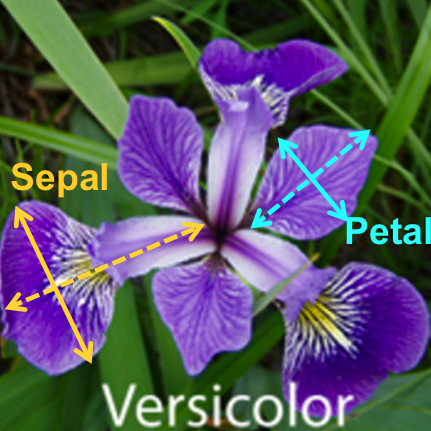

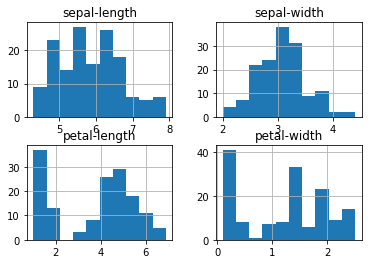

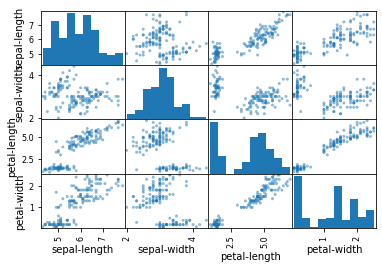

In [3]:
# image showing features of iris
display(Image(filename='iris_features.png'))

# histograms
dataframe.hist()
plt.show()

# scatter plot matrix
scatter_matrix(dataframe)
plt.show()

### Compare Algorithms

In [4]:
# Split-out validation dataset
array = dataframe.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# Spot Check Algorithms
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cross_val_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print('{:20} training results:{:.3f} {:.3f}'.format(name, cross_val_results.mean(), cross_val_results.std()))


Logistic Regression  training results:0.942 0.065
KNN                  training results:0.958 0.042
CART                 training results:0.950 0.055
SVM                  training results:0.983 0.033


### Evaluate Using Single Algorithm

0.9666666666666667


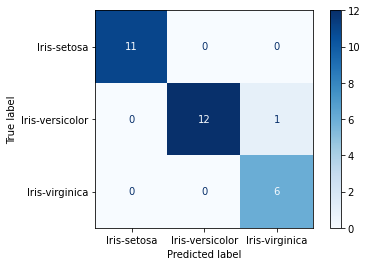

In [5]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
test_predictions = model.predict(X_test)
print(accuracy_score(Y_test, test_predictions))
class_names = sorted(set(array[:,4]))
# confusion matrix
plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

# Spam Filtering

### Visualize the Data

In [6]:
# define the dataset location
full_path = 'spambase.csv'
# load the csv file as a pandas data frame
dataframe = read_csv(full_path, header=None)
# rows/cols of data
print("rows and columns of imported data: {}\n".format(dataframe.shape))
# first 20 entries
print("first 5 entries of data:\n{}\n".format(dataframe.head(5)))
# class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

rows and columns of imported data: (4601, 58)

first 5 entries of data:
     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]

Class=1, Count=1813, Percentage=39.404%
Class=0, Count=2788, Percentage=60.596%


### Define Functions to Keep Things Clean

In [7]:
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y

# define models to test
def get_models():
    models, names = list(), list()
    # KNN
    steps = [('s',StandardScaler()),('m',KNeighborsClassifier())]
    models.append(Pipeline(steps=steps))
    names.append('KNN')
    # CART
    models.append(DecisionTreeClassifier())
    names.append('CART')
    # RF
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('Random Forest')
    # Logistic Regression
    models.append(LogisticRegression(solver='liblinear', multi_class='ovr'))
    names.append('Logistic Regression')
    # SVM
    models.append(SVC(gamma='auto'))
    names.append('SVM')
    
    return models, names

# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

def timer(start,end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    return "{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds)

### Try Different Models on Dataset

In [8]:
# load the dataset
X, y = load_dataset(full_path)
# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    start = time.time()
    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    # summarize performance
    end = time.time()
    print('{:20} mean:{:.3f} std dev:({:.3f}) time elapsed:{}'.format(names[i], mean(scores), std(scores), timer(start,end)))

KNN                  mean:0.910 std dev:(0.015) time elapsed:00:00:01.26
CART                 mean:0.917 std dev:(0.007) time elapsed:00:00:00.61
Random Forest        mean:0.952 std dev:(0.009) time elapsed:00:00:05.62
Logistic Regression  mean:0.928 std dev:(0.010) time elapsed:00:00:00.31
SVM                  mean:0.837 std dev:(0.015) time elapsed:00:00:01.91


### Use PCA to Reduce Dimensions

In [20]:
# reduce dimensions to 25
X_reduced = PCA(n_components=25).fit_transform(X)

# evaluate each model
for i in range(len(models)):
    start = time.time()
    # evaluate the model and store results
    scores = evaluate_model(X_reduced, y, models[i])
    results.append(scores)
    # summarize performance
    end = time.time()
    print('{:20} mean:{:.3f} std dev:({:.3f}) time elapsed:{}'.format(names[i], mean(scores), std(scores), timer(start,end)))

KNN                  mean:0.899 std dev:(0.015) time elapsed:00:00:00.17
CART                 mean:0.882 std dev:(0.018) time elapsed:00:00:00.14
Random Forest        mean:0.938 std dev:(0.009) time elapsed:00:00:01.31
Logistic Regression  mean:0.914 std dev:(0.011) time elapsed:00:00:00.15
SVM                  mean:0.831 std dev:(0.014) time elapsed:00:00:01.05
